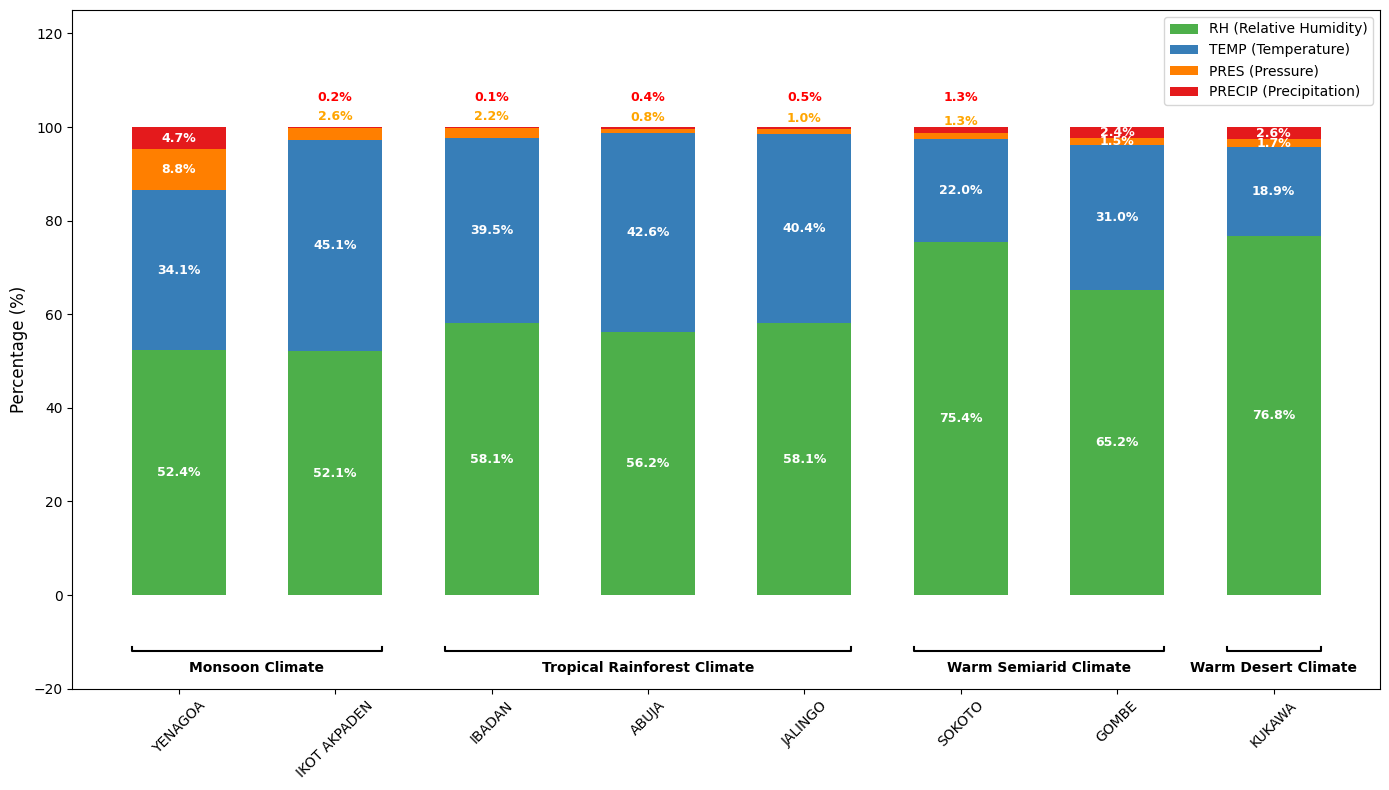

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
locations = ['YENAGOA', 'IKOT AKPADEN', 'IBADAN', 'ABUJA', 'JALINGO', 'SOKOTO', 'GOMBE', 'KUKAWA']
RH =     [52.4, 52.1, 58.1, 56.2, 58.1, 75.4, 65.2, 76.8]
TEMP =   [34.1, 45.1, 39.5, 42.6, 40.4, 22.0, 31.0, 18.9]
PRES =   [8.8, 2.6, 2.2, 0.8, 1.0, 1.3, 1.5, 1.7]
PRECIP = [4.7, 0.2, 0.1, 0.4, 0.5, 1.3, 2.4, 2.6]

# Set bar width and location
x = np.arange(len(locations))
bar_width = 0.6

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot stacked bars
bars1 = ax.bar(x, RH, bar_width, label='RH (Relative Humidity)', color='#4daf4a')
bars2 = ax.bar(x, TEMP, bar_width, bottom=RH, label='TEMP (Temperature)', color='#377eb8')
bars3_bottom = np.array(RH) + np.array(TEMP)
bars3 = ax.bar(x, PRES, bar_width, bottom=bars3_bottom, label='PRES (Pressure)', color='#ff7f00')
bars4_bottom = bars3_bottom + np.array(PRES)
bars4 = ax.bar(x, PRECIP, bar_width, bottom=bars4_bottom, label='PRECIP (Precipitation)', color='#e41a1c')

# Function to add labels inside or outside with spacing and custom color
def add_labels(bars, heights, bottoms, parameter_name, offset=3):
    for i, (bar, height, bottom) in enumerate(zip(bars, heights, bottoms)):
        x_pos = bar.get_x() + bar.get_width() / 2
        if parameter_name in ['PRES', 'PRECIP'] and locations[i] not in ['YENAGOA', 'GOMBE', 'KUKAWA']:
            y_pos = bottom + height + offset
            va = 'bottom'
            color = 'orange' if parameter_name == 'PRES' else 'red'
        else:
            y_pos = bottom + height / 2
            va = 'center'
            color = 'white'
        ax.text(x_pos, y_pos, f'{height:.1f}%', ha='center', va=va, fontsize=9, color=color, fontweight='bold')

# Add data labels
add_labels(bars1, RH, [0]*len(RH), 'RH')
add_labels(bars2, TEMP, RH, 'TEMP')
add_labels(bars3, PRES, bars3_bottom, 'PRES', offset=1)
add_labels(bars4, PRECIP, bars4_bottom, 'PRECIP', offset=5)

# Add grouping lines for climate classifications
def draw_group(start_idx, end_idx, label, y=-12):
    x_start = x[start_idx] - 0.3
    x_end = x[end_idx] + 0.3
    ax.plot([x_start, x_start, x_end, x_end], [y+1, y, y, y+1], color='black', lw=1.5)
    ax.text((x_start + x_end) / 2, y - 2, label, ha='center', va='top', fontsize=10, fontweight='bold')

# Draw groups
draw_group(0, 1, 'Monsoon Climate')
draw_group(2, 4, 'Tropical Rainforest Climate')
draw_group(5, 6, 'Warm Semiarid Climate')
draw_group(7, 7, 'Warm Desert Climate')

# Labeling and formatting
#ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
#ax.set_title('Stacked Bar Chart of Meteorological Variables by Location and Climate Type', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation=45)
ax.legend()

# Adjust y-axis to accommodate group labels
ax.set_ylim(-20, 125)

# Layout
plt.tight_layout()
plt.show()